In [ ]:
Employee Satisfaction 
Which departments or managers have the highest employee satisfaction, and is this satisfaction linked to employees' reasons for leaving?


SyntaxError: invalid syntax (3687450007.py, line 1)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
hr_data = pd.read_csv("../data/HRDataset.csv")


In [ ]:
## view first 5 rows of your data
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
# Select only relevant columns
satisfaction = hr_data[["Department", "ManagerName", "EmpSatisfaction", "TermReason", "Termd"]]
satisfaction

,Department,ManagerName,EmpSatisfaction,TermReason,Termd
0,Production,Michael Albert,5,N/A-StillEmployed,0
1,IT/IS,Simon Roup,3,career change,1
2,Production,Kissy Sullivan,3,hours,1
3,Production,Elijiah Gray,5,N/A-StillEmployed,0
4,Production,Webster Butler,4,return to school,1
...,...,...,...,...,...
306,Production,Kissy Sullivan,4,N/A-StillEmployed,0
307,Production,Brannon Miller,2,Another position,1
308,IT/IS,Janet King,5,N/A-StillEmployed,0
309,IT/IS,Simon Roup,3,N/A-StillEmployed,0


In [ ]:
#Identify null values
satisfaction.isnull().sum()

Department         0
ManagerName        0
EmpSatisfaction    0
TermReason         0
Termd              0
dtype: int64

In [ ]:
#Evaluate Employee Satisfaction for each department
satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']}).round(2)

EmpSatisfaction               
                                mean max count  sum
Department                                         
Admin Offices                   3.56   5     9   32
Executive Office                3.00   3     1    3
IT/IS                           3.96   5    50  198
Production                      3.86   5   209  807
Sales                           4.03   5    31  125
Software Engineering            4.09   5    11   45

In [ ]:
#Evaluate Employee Satisfaction by manager in each department 
satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']}).round(2)

EmpSatisfaction              
                                                   mean max count sum
Department           ManagerName                                     
Admin Offices        Board of Directors            3.00   3     1   3
                     Brandon R. LeBlanc            3.57   5     7  25
                     Janet King                    4.00   4     1   4
Executive Office     Board of Directors            3.00   3     1   3
IT/IS                Brian Champaigne              4.00   5     8  32
                     Eric Dougall                  3.50   4     4  14
                     Janet King                    5.00   5     1   5
                     Jennifer Zamora               4.50   5     6  27
                     Peter Monroe                  3.93   5    14  55
                     Simon Roup                    3.82   5    17  65
Production           Amy Dunn                      3.81   5    21  80
                     Brannon Miller                3.41   5    22  75
                     David Stanley                 3.95   5    21  83
                     Elijiah Gray                  3.95   5    22  87
                     Janet King                    3.47   5    15  52
                     Kelley Spirea                 3.82   5    22  84
                     Ketsia Liebig                 4.10   5    21  86
                     Kissy Sullivan                3.91   5    22  86
                     Michael Albert                4.05   5    22  89
                     Webster Butler                4.05   5    21  85
Sales                Debra Houlihan                4.33   5     3  13
                     Janet King                    4.00   4     1   4
                     John Smith                    3.93   5    14  55
                     Lynn Daneault                 4.08   5    13  53
Software Engineering Alex Sweetwater               4.22   5     9  38
                     Janet King                    4.00   4     1   4
                     Jennifer Zamora               3.00   3     1   3

In [ ]:
depart_avg = satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean']})
depart_avg.round(2)

,EmpSatisfaction
,mean
Department,
Admin Offices,3.56
Executive Office,3.00
IT/IS,3.96
Production,3.86
Sales,4.03
Software Engineering,4.09


In [ ]:
depart_avg.columns = ["EmpSatifaction_mean"]

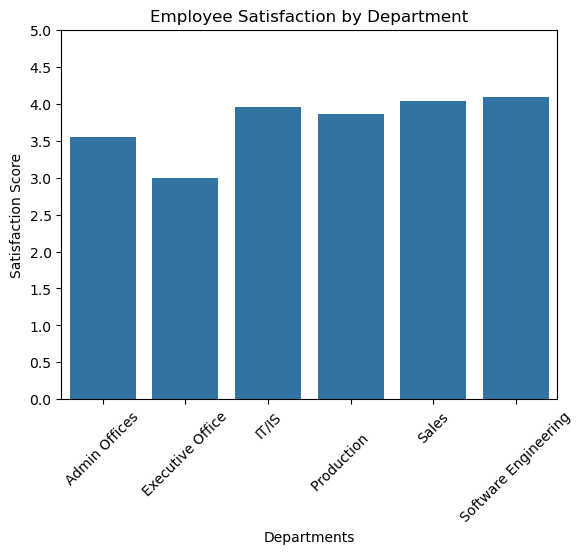

In [83]:

sns.barplot(data= depart_avg, x= "Department", y= "EmpSatifaction_mean")
plt.xlabel('Departments')
plt.ylabel('Satisfaction Score')
plt.title('Employee Satisfaction by Department')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xticks(rotation=45)
plt.show()

In [63]:
#Filter by manager for satifaction score 
manager_avg = satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean']}).round(2)
manager_avg

EmpSatisfaction
                                                   mean
Department           ManagerName                       
Admin Offices        Board of Directors            3.00
                     Brandon R. LeBlanc            3.57
                     Janet King                    4.00
Executive Office     Board of Directors            3.00
IT/IS                Brian Champaigne              4.00
                     Eric Dougall                  3.50
                     Janet King                    5.00
                     Jennifer Zamora               4.50
                     Peter Monroe                  3.93
                     Simon Roup                    3.82
Production           Amy Dunn                      3.81
                     Brannon Miller                3.41
                     David Stanley                 3.95
                     Elijiah Gray                  3.95
                     Janet King                    3.47
                     Kelley Spirea                 3.82
                     Ketsia Liebig                 4.10
                     Kissy Sullivan                3.91
                     Michael Albert                4.05
                     Webster Butler                4.05
Sales                Debra Houlihan                4.33
                     Janet King                    4.00
                     John Smith                    3.93
                     Lynn Daneault                 4.08
Software Engineering Alex Sweetwater               4.22
                     Janet King                    4.00
                     Jennifer Zamora               3.00

In [66]:
manager_avg.columns = ["EmploySatisfaction_mean"]

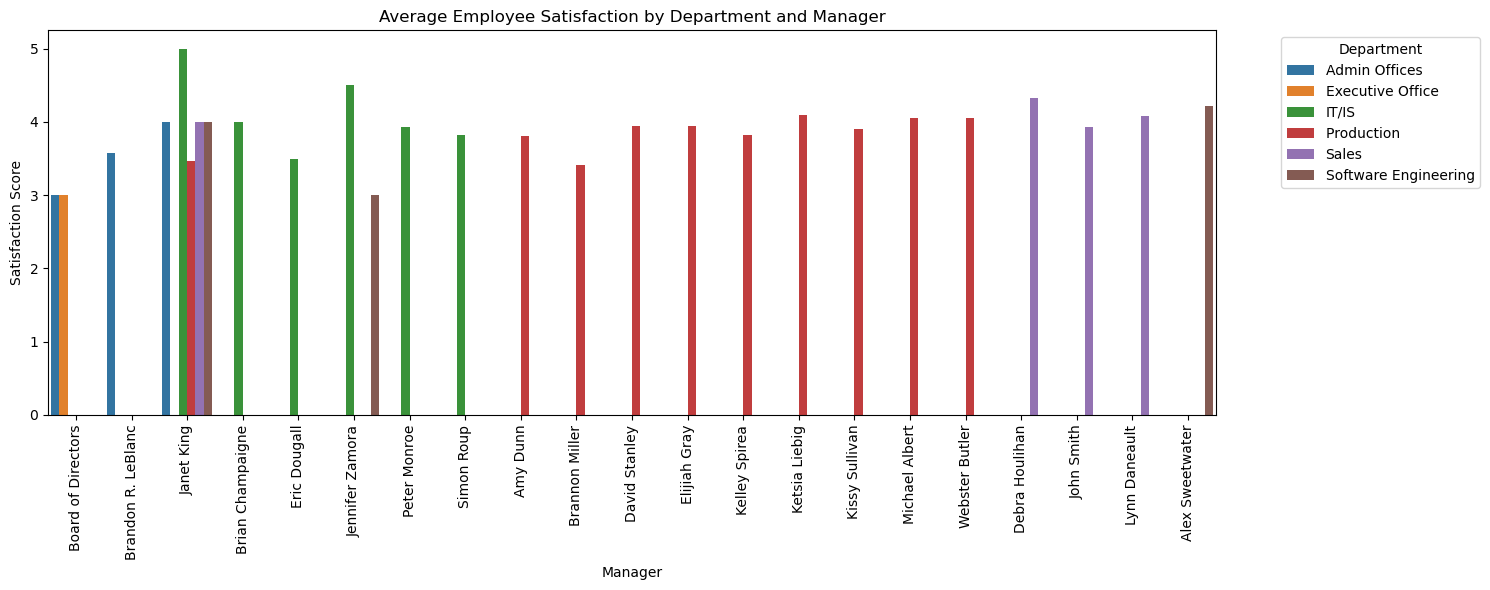

In [ ]:
#Plot visualization for Employee Satisfaction by manager for satifaction score
plt.figure(figsize=(15, 6))
sns.barplot(data= manager_avg, x= "ManagerName", y= "EmploySatisfaction_mean", hue="Department", width= 0.9)
plt.title('Average Employee Satisfaction by Department and Manager')
plt.xlabel('Manager')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
satisfaction[satisfaction["Termd"]] == 1)

SyntaxError: unmatched ')' (61550191.py, line 2)

In [ ]:
terminated_only = satisfaction[satisfaction["Termd"] == 1]


plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='RecruitmentSource', y='Rate', hue='Status', palette='Set2')
plt.title('Retention vs Termination Rates by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()